In [305]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [306]:
df = pd.read_csv(r'C:\Users\Frank\Desktop\Proyectos Linkedin\Python Proyectos\Redes Neuronales\Perceptrón Multicapa (MLP)\Clasificación Binaria\Dia 37\deaths-temperature-gasparrini new.csv')
df.head(14)

,country,Code,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
0,Australia,AUS,2015,0.67,5.82,0.14,0.32
1,Brazil,BRA,2015,0.49,2.34,0.48,0.22
2,Canada,CAN,2015,0.25,4.21,0.27,0.26
3,China,CHN,2015,1.06,9.31,0.24,0.40
4,Italy,ITA,2015,0.85,8.51,0.94,0.67
5,Japan,JPN,2015,0.77,9.04,0.13,0.18
6,South Korea,KOR,2015,0.35,6.58,0.10,0.21
7,Spain,ESP,2015,0.71,4.75,0.54,0.52
8,Sweden,SWE,2015,0.27,3.44,0.03,0.15
9,Taiwan,TWN,2015,0.71,3.19,0.60,0.25


In [307]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 14
Total de variables disponibles (columnas) = 7 
Columnas que cuentan con un valor nulo -
country          0
Code             0
Year             0
Extreme cold     0
Moderate cold    0
Moderate heat    0
Extreme heat     0
dtype: int64


In [308]:
df2.describe()

,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
count,14.0,14.000000,14.000000,14.000000,14.000000
mean,2015.0,0.607857,5.627143,0.310000,0.294286
std,0.0,0.240806,2.417413,0.260118,0.144260
min,2015.0,0.250000,2.170000,0.030000,0.150000
25%,2015.0,0.442500,3.632500,0.132500,0.212500
50%,2015.0,0.650000,5.485000,0.215000,0.240000
75%,2015.0,0.755000,7.377500,0.477500,0.310000
max,2015.0,1.060000,9.310000,0.940000,0.670000


In [309]:
import pylab
import scipy.stats as stats

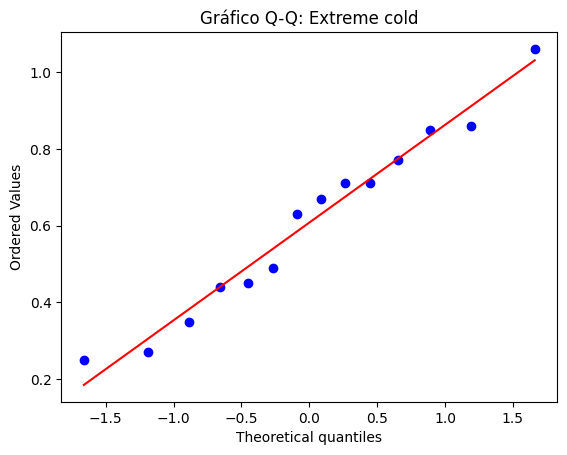

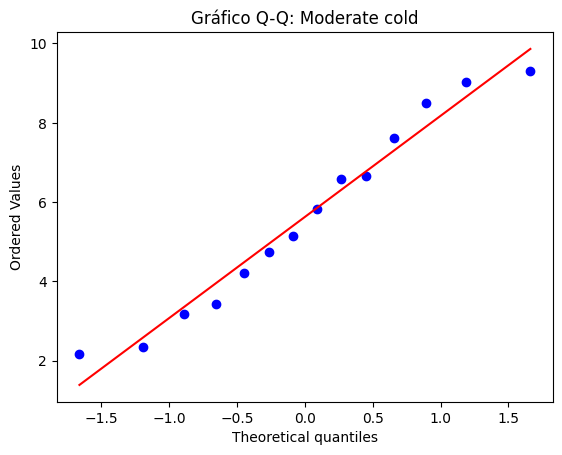

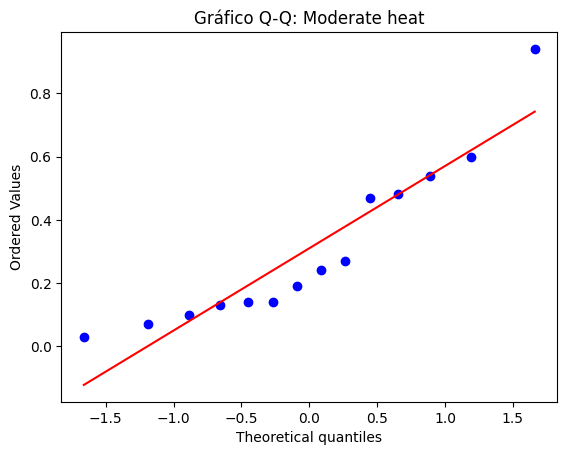

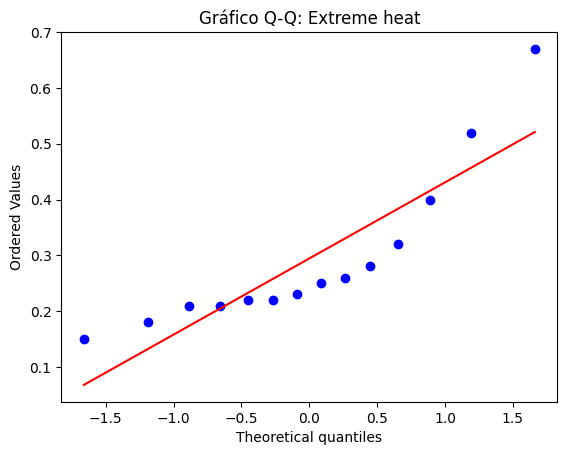

In [310]:
# Función para crear gráficos Q-Q
def crear_quantile(variable, j):
    plt.figure(j)
    stats.probplot(df2[variable], dist="norm", plot=pylab)
    plt.title('Gráfico Q-Q: ' + variable)
    plt.show()

# Generar gráficos Q-Q para cada variable    
variables = ['Extreme cold', 'Moderate cold', 'Moderate heat', 'Extreme heat']
j = 0
for variable in variables:
    crear_quantile(variable,j)
    j += 1


Si el p_value es mayor a 0.05, se asume que se trata de una distribución normal:

In [311]:
from scipy.stats import shapiro

In [312]:
# Función para calcular la prueba de Shapiro-Wilk
def calcular_shapiro(variable):
    estadistico, p_value = stats.shapiro(df2[variable])
    print(f"Estadístico de {variable} = {estadistico: .2f}, p-valor de = {p_value: .4f}")

In [313]:
# Lista de variables
variables = ['Extreme cold', 'Moderate cold', 'Moderate heat', 'Extreme heat']

# Calcular la prueba de Shapiro-Wilk para cada variable
for variable in variables:
    calcular_shapiro(variable)

Estadístico de Extreme cold =  0.96, p-valor de =  0.7969
Estadístico de Moderate cold =  0.95, p-valor de =  0.5276
Estadístico de Moderate heat =  0.87, p-valor de =  0.0470
Estadístico de Extreme heat =  0.79, p-valor de =  0.0041


In [314]:
from sklearn.preprocessing import MinMaxScaler

# Definir caracteristicas numericas y categoricas
numeric_features = ['Moderate heat','Extreme heat']

In [315]:
scaler = MinMaxScaler()
# Aplicar la normalización
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [316]:
# Función para calcular la prueba de Shapiro-Wilk
def calcular_shapiro(variable):
    estadistico, p_value = stats.shapiro(df2[variable])
    print(f"Estadístico de {variable} = {estadistico: .2f}, p-valor de = {p_value: .4f}")
    # Lista de variables
variables = ['Moderate heat', 'Extreme heat']

# Calcular la prueba de Shapiro-Wilk para cada variable
for variable in variables:
    calcular_shapiro(variable)

Estadístico de Moderate heat =  0.87, p-valor de =  0.0470
Estadístico de Extreme heat =  0.79, p-valor de =  0.0041


In [317]:
df2.describe()

,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
count,14.0,14.000000,14.000000,14.000000,14.000000
mean,2015.0,0.607857,5.627143,0.307692,0.277473
std,0.0,0.240806,2.417413,0.285844,0.277423
min,2015.0,0.250000,2.170000,0.000000,0.000000
25%,2015.0,0.442500,3.632500,0.112637,0.120192
50%,2015.0,0.650000,5.485000,0.203297,0.173077
75%,2015.0,0.755000,7.377500,0.491758,0.307692
max,2015.0,1.060000,9.310000,1.000000,1.000000


# Red neuronal

In [318]:
df2.head()

,country,Code,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
0,Australia,AUS,2015,0.67,5.82,0.120879,0.326923
1,Brazil,BRA,2015,0.49,2.34,0.494505,0.134615
2,Canada,CAN,2015,0.25,4.21,0.263736,0.211538
3,China,CHN,2015,1.06,9.31,0.230769,0.480769
4,Italy,ITA,2015,0.85,8.51,1.000000,1.000000


In [319]:
# Crear la variable objetivo
df2['extreme_heat_critical'] = (df2['Extreme heat'] > 0.5).astype(int)

In [320]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [321]:
# Definir X e Y

X = df2.drop(columns=['country', 'Code', 'Year'])
y = df2['extreme_heat_critical']

In [322]:
def build_modelo():
    oculta = tf.keras.layers.Dense(units=64,activation='relu',input_shape=[X.shape[1]])
    dropout = tf.keras.layers.Dropout(0.3)
    oculta1 = tf.keras.layers.Dense(units=32,activation='relu')
    dropout1 = tf.keras.layers.Dropout(0.3)
    salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
    modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])
    modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
    return modelo

In [323]:
modelo = build_modelo()

In [324]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [325]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [326]:
# Realizar validación cruzada manualmente
kf = KFold(n_splits=10, shuffle=True, random_state=42)
val_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = build_modelo()
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])
    
    val_predictions = (model.predict(X_val) > 0.5).astype("int32")
    val_score = accuracy_score(y_val, val_predictions)
    val_scores.append(val_score)

print(f'Validación cruzada: {val_scores}')
print(f'Promedio de validación cruzada: {np.mean(val_scores)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Validación cruzada: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
Promedio de validación cruzada: 0.8


In [327]:
# Entrenal modelo final
model_final = build_modelo()
historial = model_final.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])

In [331]:
# Evaluar el modelo final en el conjunto de prueba
test_predicciones = (model_final.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test,test_predicciones)
print(f'Precision en el conjunto de entrenamiento: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Precision en el conjunto de entrenamiento: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.3553
Test Accuracy: 100.00%


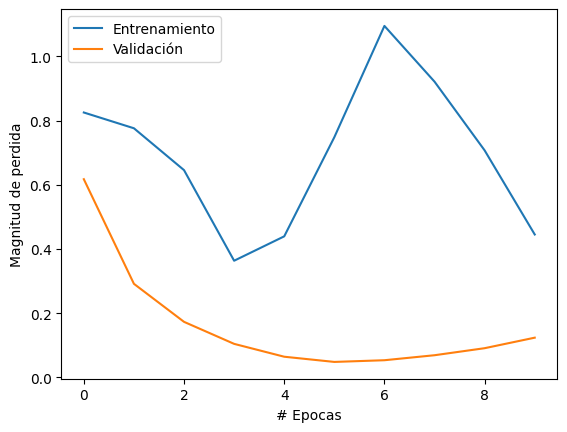

In [332]:
# Graficar la perdida del modelo final

test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy_percent = test_accuracy * 100

plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

print(f'Test Accuracy: {test_accuracy_percent:.2f}%')